# predicting student test score

In [1]:
# Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
train = pd.read_csv("/kaggle/input/playground-series-s6e1/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s6e1/test.csv")

In [2]:
train.head()

,id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,0,21,female,b.sc,7.91,98.8,no,4.9,average,online videos,low,easy,78.3
1,1,18,other,diploma,4.95,94.8,yes,4.7,poor,self-study,medium,moderate,46.7
2,2,20,female,b.sc,4.68,92.6,yes,5.8,poor,coaching,high,moderate,99.0
3,3,19,male,b.sc,2.00,49.5,yes,8.3,average,group study,high,moderate,63.9
4,4,23,male,bca,7.65,86.9,yes,9.6,good,self-study,high,easy,100.0


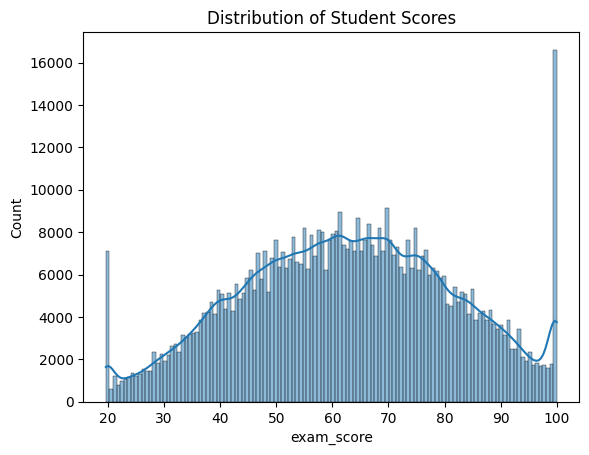

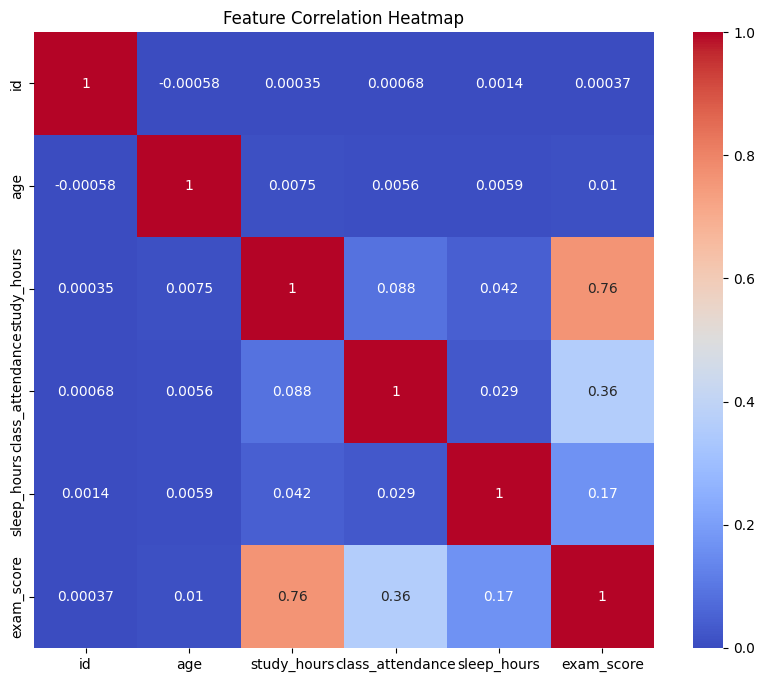

In [3]:
# Exploratory Data Analysis (Graphs)
# 1. Distribution of Test Scores
sns.histplot(train['exam_score'], kde=True)
plt.title('Distribution of Student Scores')
plt.show()

# 2. Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(train.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [4]:
# Data preprocessing
def preprocess(df):
    df = df.copy()
    
    # Map ranked categories
    rank_maps = {
        'sleep_quality': {'poor': 0, 'average': 1, 'good': 2},
        'facility_rating': {'low': 0, 'medium': 1, 'high': 2},
        'exam_difficulty': {'easy': 0, 'moderate': 1, 'hard': 2},
        'internet_access': {'no': 0, 'yes': 1}
    }
    for col, mapping in rank_maps.items():
        df[col] = df[col].map(mapping)
    
    # Convert remaining text to dummy columns
    df = pd.get_dummies(df, columns=['gender', 'course', 'study_method'], drop_first=True)
    return df

X = preprocess(train.drop(columns=['id', 'exam_score']))
y = train['exam_score']
X_test = preprocess(test.drop(columns=['id'])).reindex(columns=X.columns, fill_value=0)

In [5]:
# Model Training
# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Fit Model
model = HistGradientBoostingRegressor(max_iter=300, random_state=42)
model.fit(X_train, y_train)

HistGradientBoostingRegressor(max_iter=300, random_state=42)

Average Error (RMSE): 8.78
Accuracy (R2 Score): 0.7832


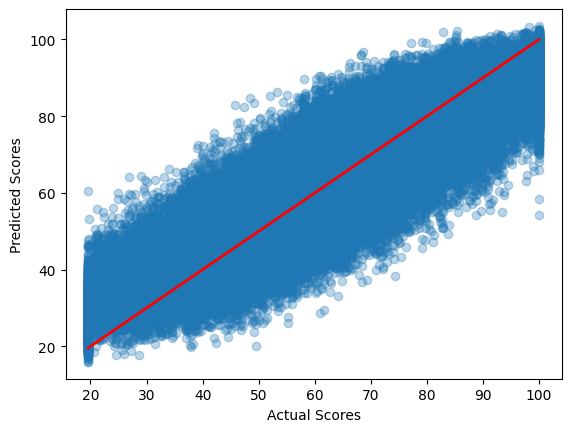

In [6]:
# Evaluation and Results
y_pred = model.predict(X_val)

print(f"Average Error (RMSE): {np.sqrt(mean_squared_error(y_val, y_pred)):.2f}")
print(f"Accuracy (R2 Score): {r2_score(y_val, y_pred):.4f}")

# Graph: Actual vs Predicted
plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.show()

In [7]:
# Final Prediction Export 
final_preds = model.predict(X_test)
submission = pd.read_csv("/kaggle/input/playground-series-s6e1/sample_submission.csv")
submission["exam_score"]=final_preds
submission.to_csv('student_predictions.csv', index=False)
submission.head()

,id,exam_score
0,630000,71.010087
1,630001,70.265259
2,630002,87.607913
3,630003,55.205446
4,630004,47.385120
